
Результаты вычислений:

Линейная функция: f(x) = 2.1963600170624233x+(-0.06144746196502839)
Мера отклонения: 0.09970518981942297
Среднеквадратичное отклонение: 0.08439075347937075


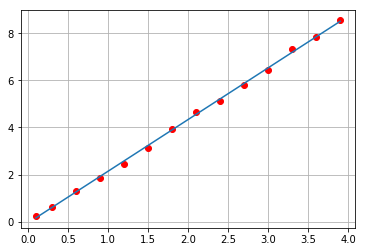



Квадратичная функция: f(x) = 0.00510411969402247*x^2+(2.089528452596723)*x+(0.02706813243534273)
Мера отклонения: 0.3681203887622463
Среднеквадратичное отклонение: 0.16215521417153872


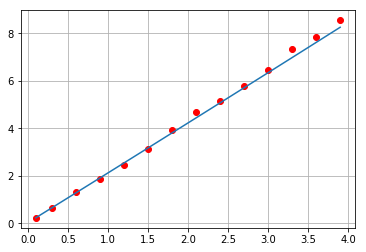



Экспоненциальная функция: f(x) = 0.6672959655280322*e^((0.7681603464872424)*x)
Мера отклонения: 38.59886553500998
Среднеквадратичное отклонение: 1.6604402500328894


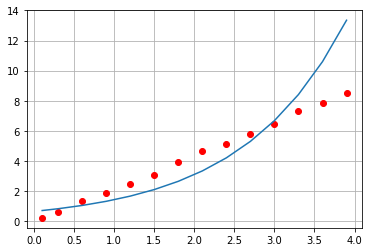



Степенная функция: f(x) = 2.1652348835686985*x^(0.9936830004118467)
Мера отклонения: 0.16748140228315467
Среднеквадратичное отклонение: 0.10937530482672778


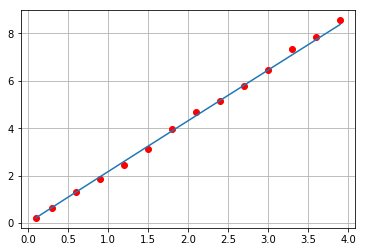



Логарифмическая функция: f(x) = 3.4756314657680103+(2.3186856122746806)*ln(x)
Мера отклонения: 19.15619649820461
Среднеквадратичное отклонение: 1.169743454724906


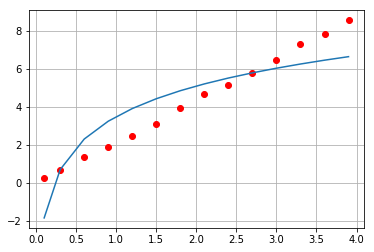




Оптимальной функцией является линейная функция: f(x) = 2.1963600170624233x+(-0.06144746196502839)
Среднеквадратичное отклонение - 0.08439075347937075
Таблица вычислений доступна в файле


In [6]:
import matplotlib.pyplot as plt
import numpy as nmp 
import pandas as pd
import math
%matplotlib inline


def draw_plot(func, a, b, c, xx, yy):
    plt.figure()
    plt.plot(xx, yy, 'ro')
    y2 = func(a, b, c, xx)
    plt.plot(xx, y2)
    plt.grid()
    plt.show()


def linear(a,b,c,x):
    return a*x+b


def square(a,b,c,x):
    return a*x*x+b*x+c


def exponent(a,b,c,x):
    return a*pow(math.exp(1),b*x)


def logarithm(a,b,c,x):
    return a + b*nmp.log(x)


def power(a,b,c,x):
    return a*pow(x,b)


def linear_coefficients(xs,ys):
    Sx = 0
    Sxx = 0
    Sxy = 0
    Sy = 0
    n = (len(xs))
    for i in range(0,n):
        Sx += xs[i]  
        Sy += ys[i]
        Sxx += (xs[i]*xs[i])
        Sxy += (xs[i]*ys[i])
    a = (Sxy*n-Sx*Sy)/(Sxx*n-Sx*Sx)
    b = (Sxx*Sy-Sx*Sxy)/(Sxx*n-Sx*Sx)
    return [a,b]


def square_coefficients(xs,ys):
    matr_sums = nmp.array([[len(xs), nmp.sum(xs), nmp.sum(pow(xs,2))],
                           [nmp.sum(xs), nmp.sum(pow(xs,2)), nmp.sum(pow(xs,3))], 
                           [nmp.sum(pow(xs,2)), nmp.sum(pow(xs,3)), nmp.sum(pow(xs,4))]])
    matr_res = nmp.array([nmp.sum(ys), nmp.sum(ys*xs), nmp.sum(ys*pow(xs,2))])
    return nmp.linalg.solve(matr_sums, matr_res)


def exponent_coefficients(xs,ys): 
    ln_y = nmp.array([])
    for y in ys:
        ln_y = nmp.append(ln_y, [math.log(y, math.exp(1))])
    b, a = linear_coefficients(xs, ln_y)
    a = math.exp(a)
    return [a,b]


def logarithmic_coefficients(xs,ys):
    ln_x = nmp.array([])
    for x in xs:
        ln_x = nmp.append(ln_x, [math.log(x, math.exp(1))])
    b, a = linear_coefficients(ln_x, ys)
    return [a, b]


def power_coefficients(xs,ys):
    ln_y = nmp.array([])
    ln_x = nmp.array([])
    for i in ys:
        ln_y = nmp.append(ln_y, [math.log(i, math.exp(1))])
    for i in xs:
        ln_x = nmp.append(ln_x, [math.log(i, math.exp(1))])
    b, a = linear_coefficients(ln_x, ln_y)
    a = nmp.exp(a)
    return [a,b]


def dev_value(x_arr,y_arr,a,b,c,func):
    n = len(x_arr)
    summ = 0
    for i in range(0,n):
        summ += pow(func(a,b,c,x_arr[i])-y_arr[i],2)
    return summ


def avg_square_dev(x_arr,y_arr,a,b,c,func):
    n = len(x_arr)
    return math.sqrt(dev_value(x_arr,y_arr,a,b,c,func)/n)


f = open('graph.txt','r')
f2 = open('output.txt','w')
x_file = str(f.readline())
y_file = str(f.readline())
f.close()

x_arr = x_file.split()
y_arr = y_file.split()
x_a = nmp.asarray(list(map(float,x_arr)))
y_a = nmp.asarray(list(map(float,y_arr)))

min_digit = 1000000000
min_func = 0

print('\nРезультаты вычислений:\n')
ka,kb = linear_coefficients(x_a,y_a)
print(f'Линейная функция: f(x) = {str(ka)}x+({str(kb)})')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,linear))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,linear))}')
draw_plot(linear, ka, kb, 0, x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,linear)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,linear)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 1
    min_digit = k_avg

print('\n')
ka,kb,kc = square_coefficients(x_a,y_a)
print(f'Квадратичная функция: f(x) = {str(ka)}*x^2+({str(kb)})*x+({str(kc)})')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,kc,square))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,kc,square))}')
draw_plot(square, ka, kb, kc,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,kc,square)
k_avg = avg_square_dev(x_a,y_a,ka,kb,kc,square)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = kc
    min_func = 2
    min_digit = k_avg
                          
print('\n')
ka,kb = exponent_coefficients(x_a,y_a)
print(f'Экспоненциальная функция: f(x) = {str(ka)}*e^(({str(kb)})*x)')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,exponent))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,exponent))}')
draw_plot(exponent, ka, kb, 0,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,exponent)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,exponent)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 3
    min_digit = k_avg
                          
print('\n')
ka,kb = power_coefficients(x_a,y_a)
print(f'Степенная функция: f(x) = {str(ka)}*x^({str(kb)})')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,power))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,power))}')
draw_plot(power, ka, kb, 0,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,power)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,power)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 4
    min_digit = k_avg
    
print('\n')
ka,kb = logarithmic_coefficients(x_a,y_a)
print(f'Логарифмическая функция: f(x) = {str(ka)}+({str(kb)})*ln(x)')
print(f'Мера отклонения: {str(dev_value(x_a,y_a,ka,kb,0,logarithm))}')
print(f'Среднеквадратичное отклонение: {str(avg_square_dev(x_a,y_a,ka,kb,0,logarithm))}')
draw_plot(logarithm, ka, kb, 0, x_a, y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,logarithm)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,logarithm)
if (k_avg < min_digit):
    min_a = ka
    min_b = kb
    min_c = 0
    min_func = 5
    min_digit = k_avg

data = nmp.array([['Вид функции', 'Линейная', 'Квадратичная', 'Экспоненциальная', 'Логарифмическая', 'Степенная']])
digit_rows = nmp.array([])
y_str_arr = nmp.array([])
for i, j in zip(x_a, y_a):
    x_st = str(i)
    y_st = str(j)
    digit_rows = nmp.append(digit_rows, 'x = ' + x_st + ', y = ' + y_st)
    ka,kb = linear_coefficients(x_a,y_a)
    digit_rows = nmp.append(digit_rows, linear(ka,kb,0,i))
    kc,kb,ka = square_coefficients(x_a,y_a)
    digit_rows = nmp.append(digit_rows, square(ka,kb,kc,i))
    ka,kb = exponent_coefficients(x_a,y_a)
    digit_rows = nmp.append(digit_rows, exponent(ka,kb,0,i))
    ka,kb = power_coefficients(x_a,y_a)
    digit_rows = nmp.append(digit_rows, power(ka,kb,0,i))
    ka,kb = logarithmic_coefficients(x_a,y_a)
    digit_rows = nmp.append(digit_rows, logarithm(ka,kb,0,i))
    data = nmp.append(data, [digit_rows], 0)
    digit_rows = []

deviation_row = nmp.array([])
avg_dev_row = nmp.array([])
a_row = nmp.array([])
b_row = nmp.array([])
c_row = nmp.array([])

deviation_row = nmp.append(deviation_row, 'S')
avg_dev_row = nmp.append(avg_dev_row, 'σ')
a_row = nmp.append(a_row, 'Коэффициент a')
b_row = nmp.append(b_row, 'Коэффициент b')
c_row = nmp.append(c_row, 'Коэффициент c')

ka,kb = linear_coefficients(x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,linear)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,linear)
deviation_row = nmp.append(deviation_row, k_s)
avg_dev_row = nmp.append(avg_dev_row, k_avg)
a_row = nmp.append(a_row, ka)
b_row = nmp.append(b_row, kb)
c_row = nmp.append(c_row, 0)

kc,kb,ka = square_coefficients(x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,kc,square)
k_avg = avg_square_dev(x_a,y_a,ka,kb,kc,square)
deviation_row = nmp.append(deviation_row, k_s)
avg_dev_row = nmp.append(avg_dev_row, k_avg)
a_row = nmp.append(a_row, ka)
b_row = nmp.append(b_row, kb)
c_row = nmp.append(c_row, kc)

ka,kb = exponent_coefficients(x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,exponent)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,exponent)
deviation_row = nmp.append(deviation_row, k_s)
avg_dev_row = nmp.append(avg_dev_row, k_avg)
a_row = nmp.append(a_row, ka)
b_row = nmp.append(b_row, kb)
c_row = nmp.append(c_row, 0)

ka,kb = power_coefficients(x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,power)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,power)
deviation_row = nmp.append(deviation_row, k_s)
avg_dev_row = nmp.append(avg_dev_row, k_avg)
a_row = nmp.append(a_row, ka)
b_row = nmp.append(b_row, kb)
c_row = nmp.append(c_row, 0)

ka,kb = logarithmic_coefficients(x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,logarithm)
k_avg = avg_square_dev(x_a,y_a,ka,kb,0,logarithm)
deviation_row = nmp.append(deviation_row, k_s)
avg_dev_row = nmp.append(avg_dev_row, k_avg)
a_row = nmp.append(a_row, ka)
b_row = nmp.append(b_row, kb)
c_row = nmp.append(c_row, 0)

data = nmp.append(data, [deviation_row], 0)
data = nmp.append(data, [avg_dev_row], 0)
data = nmp.append(data, [a_row], 0)
data = nmp.append(data, [b_row], 0)
data = nmp.append(data, [c_row], 0)
    
datta = nmp.matrix(data)
for line in datta:
    nmp.savetxt(f2, line, '%20s |')
f2.close()


print('\n\n')
print('Оптимальной функцией является ', end = '')
if(min_func == 1):
    print(f'линейная функция: f(x) = {str(min_a)}x+({str(min_b)})')
if(min_func == 2):
    print(f'квадратичная функция: f(x) = {str(min_a)}*x^2+({str(min_b)})*x+({str(min_c)})')
if(min_func == 3):
    print(f'экспоненциальная функция: f(x) = {str(min_a)}*e^(({str(min_b)})*x)')
if(min_func == 4):
    print(f'степенная функция: f(x) = {str(min_a)}*x^({str(min_b)})')
if(min_func == 5):
    print(f'логарифмическая функция: f(x) = {str(min_a)}+({str(min_b)})*ln(x)')
print(f'Среднеквадратичное отклонение - {str(min_digit)}')
print('Таблица вычислений доступна в файле')

